<a href="https://colab.research.google.com/github/robyng15/Boolean-Models/blob/master/Boolean_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

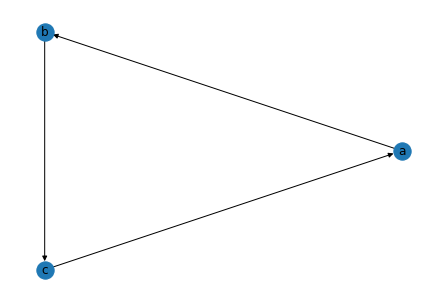

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Create list to specify 'edges'
edges = [('a','b'),
         ('b','c'),
         ('c','a')]

# Variable to hold network
G = nx.DiGraph(edges)

# Visualize network
nx.draw_circular(G,with_labels=True)
plt.savefig('example_graph_drawing.png')

/usr/local/lib/python3.6/dist-packages/networkx/drawing/layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


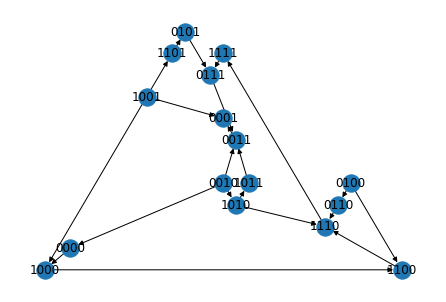

In [2]:
edges = [('0000','1000'),
         ('0000', '0000'),
         ('1000', '1000'),
         ('1000', '1100'),
         ('1100', '1100'),
         ('1100', '1110'),
         ('1110', '1111'),
         ('1111', '0111'),
         ('0111', '0011'),
         ('0011', '0001'),
         ('0010', '1010'),
         ('0010', '0000'),
         ('0010', '0011'),
         ('1010', '1110'),
         ('1010', '1011'),
         ('1011', '0011'),
         ('0110', '1110'),
         ('0100', '1100'),
         ('0100', '0110'),
         ('1101', '0101'),
         ('0101', '0111'),
         ('1001', '0001'),
         ('1001', '1101'),
         ('1001', '1000')]

G = nx.DiGraph(edges)
nx.draw_planar(G,with_labels=True)
plt.savefig('fifth_problem_graph_drawing.png')
        

In [71]:
file = open('figure-1-ii-model.txt')
lines = file.readlines()
new_list = []
rules = []
gene_with_rule = list()

#print(lines)

def create_list_gene_with_rule(locallines):
  length = len(locallines)
  keywds = ['or','and','not']
  gene_with_rule = []
  for i in range(length - 1):
    #print(lines[i+1])
    l = lines[i+1].strip('\n')
    #print(l)
    gene_with_rule.append(l.split('\t'))
    #print(gene_with_rule[i])
    gene_with_rule[i][1] = gene_with_rule[i][1].replace(')', '')
    gene_with_rule[i][1] = gene_with_rule[i][1].replace('(', '')
    gene_with_rule[i][1] = gene_with_rule[i][1].replace(' ', '')
    gene_with_rule[i][1] = gene_with_rule[i][1].replace('\n', '')
  #if keywds[0] != keywds[1]:
    #keywds.append(keywds[i])
  allkeywds = list(keywds)
  allkeywds.extend([gene_with_rule[k][0] for k in range(length-1)])
  #print(allkeywds)
  lengthkeywds = len(allkeywds)
  for j in range(length -1):
    for k in range(lengthkeywds):
      if allkeywds[k] in gene_with_rule[j][1][0:len(gene_with_rule[j][1])-1]:
        gene_with_rule[j][1] = gene_with_rule[j][1].replace(allkeywds[k], allkeywds[k] + ',')
  return gene_with_rule

print(create_list_gene_with_rule(lines))


[['a', 'c'], ['b', 'a'], ['c', 'b']]


In [72]:
# Loop to remove unnecessary info and creates a new list = (gene, rule)
for line in lines:
  line = line.strip()
  line = line.split('\t')
  if line[1] != 'Rule':
    rules.append(line[1])
  #print(line[1].split(' '))
  for token in line[1].split(' '):
      if token != 'not' and token != '(' and token != ')' and token!= 'or' and token != "Rule":
        new_list.append((line[0],token))
#print(new_list)

proteins = [item[0] for item in create_list_gene_with_rule(lines)]
#print(len(create_list_gene_with_rule(lines)[1]))
#if len(create_list_gene_with_rule(lines)[0]) != len(create_list_gene_with_rule(lines)[1]):
  #proteins.append(create_list_gene_with_rule(lines)[1])
print(proteins)
#print(rules)

['a', 'b', 'c']


In [73]:
# Function to return formula depending on protein_id
def get_formula(protein_id, lines):
  #for i,rule in enumerate(create_list_gene_with_rule(list(lines))):
  for rule in create_list_gene_with_rule(list(lines)):
    if protein_id == rule[0]:
      #return(rule[1],i)
      return(rule[1])
print(get_formula('a',list(lines)))
#print(create_list_gene_with_rule(list(lines)))

c


In [76]:
# Function to determine protein state based on the rule for the system 
def compute_protein_state(formula, net_state): 
  # Loop to return value based on formula
  #print(formula)
  tokens = formula.split(',')
  print(tokens)
  if 'not' in tokens:
    activator_flag = False
    #activator_state = 0
    inhibitor_state = 0
    for j in range(0, len(tokens)):
      # all prot before not are activators, after not are inhibitors
      #if tokens.index(tokens[j]) < tokens.index('not'):
      for k in range(0, len(create_list_gene_with_rule(lines))):
        if tokens.index(tokens[j]) < tokens.index('not'):
          if tokens[j] == (create_list_gene_with_rule(lines))[k][0]:
            activator_state = 0
            activator_flag = True
            #print(activator_flag)
            state = net_state[k]
            if state == 1:
              activator_state = 1
            if state == 0:
              activator_state = 0
        if j > tokens.index('not'):
          #print(tokens.index('not'))
          if tokens[j] == (create_list_gene_with_rule(lines))[k][0]:
            state = net_state[k]
            if state == 1:
              inhibitor_state = 0
            if state == 0:
              inhibitor_state = 1
              #print(inhibitor_state)
              #print(activator_flag, activator_state, inhibitor_state)
              break
    if activator_flag == True:
      if activator_state == 1 and inhibitor_state == 1: 
        return 1
      else:
        return 0
    else:   # activator_flag == False
      for k in range(0,len(create_list_gene_with_rule(lines))):
        if tokens[j] == (create_list_gene_with_rule(lines))[k][0]:
            state = net_state[k]
            #print(state)
            if state == 1:
              inhibitor_state = 0
              print(activator_flag, inhibitor_state)
              print(tokens[j], state)
            if state == 0:
              inhibitor_state = 1
              break
      if inhibitor_state == 0:
        return 0
      else:
        return 1
     
  elif 'or' in tokens:
    for j in range(0, len(tokens)):
      for k in range(0, len(create_list_gene_with_rule(lines))):
        if tokens[j] == (create_list_gene_with_rule(lines))[k][0]:
          state = net_state[k]
          if state == 1:
            return 1
    return 0
  elif '' in tokens:
    for j in range(0, len(tokens)):
      for k in range(0, len(create_list_gene_with_rule(lines))):
       #print(create_list_gene_with_rule(lines)[k][0])
        if tokens[j] == '':
          return net_state[k]
  else:
    for j in range(0, len(tokens)):
      for k in range(0, len(create_list_gene_with_rule(lines))):
        if tokens[j] == (create_list_gene_with_rule(lines))[k][0]:
          state = net_state[k]
          if state == 1:
            return 1
          elif state == 0:
            return 0
print(compute_protein_state(get_formula('a', lines), [0,0,1]))

['c']
1


In [86]:
# Function to determine protein state synchronously
def compute_next_protein_state_synchronous(gene_with_rule, net_state, lines):
  next_state_list = list(net_state)
  #print(len(gene_with_rule))
  for i in range(len(gene_with_rule)):
    formula = get_formula(gene_with_rule[i][0],lines)
    new_state_value = compute_protein_state(formula, net_state)
    next_state_list[i] = new_state_value
  #print(new_state_value)
  return next_state_list
print(compute_next_protein_state_synchronous(create_list_gene_with_rule(lines), [0,0,0], lines))

['c']
['a']
['b']
[0, 0, 0]


In [82]:
# Function to determine the protein state asynchronously
def compute_next_protein_state_asynchronous(gene_with_rule, net_state, lines):  
  next_state_list = list()
  #print(proteins)
  #for prot in proteins:
  #  next_state_list.append([prot, net_state])
  for gwr in gene_with_rule:
    next_state_list.append([gwr[0], list(net_state)])
  #print(next_state_list)
  for i in range(0, len(next_state_list)):
    next_state_list[i][1][i] = compute_protein_state(gene_with_rule[i][1], list(net_state))
  return next_state_list
print(compute_next_protein_state_asynchronous(create_list_gene_with_rule(lines), [0,0,0], lines))

['c']
['a']
['b']
[['a', [0, 0, 0]], ['b', [0, 0, 0]], ['c', [0, 0, 0]]]


In [83]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx

def compute_state_space_network_synchronous(gene_with_rule, net_state):
  # creates a list of all the possible states depending on amt of proteins
  all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
  #print(len(all_states))
  start_state = all_states[0]
  used_states = all_states[0]
  edgelist = []
  for start_state in all_states:
    next_state_space = compute_next_protein_state_synchronous(gene_with_rule, 
                                                              start_state, 
                                                                lines)
    edgelist.append((start_state, next_state_space))
    #print(next_state_space[0][1])
    #print(edgelist)

  return edgelist


#if next_state_space[k][1] not in edgelist:
#  edgelist.append((start_state, next_state_space[k][1]))

output = compute_state_space_network_synchronous(create_list_gene_with_rule(lines), [0,0,0])
#print(output)

['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']


[['000'], ['111'], ['101', '110', '011'], ['100', '010', '001']]


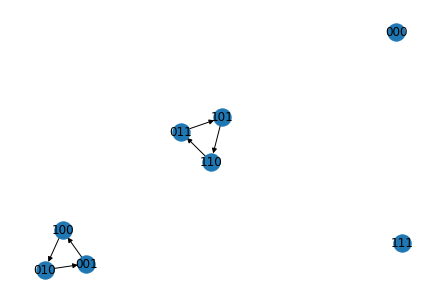

In [84]:
edgelist = []
for seq in output:
  sequence = seq
  edgelist.append((''.join([str(st) for st in seq[0]]),
                   ''.join([str(st) for st in seq[1]])))
G = nx.DiGraph(edgelist)
print(list(nx.simple_cycles(G)))
#print(nx.cycle_basis(G,0))
#if the edge of the graph is a self-loop --> steady state
nx.draw_spring(G, with_labels=True)
  
#print(edgelist)
plt.savefig('state_space_network_synchronous_model_ii.png')

In [87]:
def compute_state_space_network_asynchronous(gene_with_rule, net_state):
  # creates a list of all the possible states depending on amt of proteins
  all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
  #print(len(all_states))
  start_state = all_states[0]
  used_states = all_states[0]
  edgelist = []
  for start_state in all_states:
    next_state_space = compute_next_protein_state_asynchronous(gene_with_rule, 
                                                              start_state, 
                                                                lines)
    #print(next_state_space[0][1])
    #print(edgelist)
    for k in range(len(next_state_space)):
      if next_state_space[k][1] not in edgelist:
        edgelist.append((start_state, next_state_space[k][1]))
      #if edgelist.count(next_state_space) > 1: 
  return edgelist

output_a = compute_state_space_network_asynchronous(create_list_gene_with_rule(lines), [1,1,1])
#print(output_a)

['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']


[('000', '000'), ('000', '000'), ('000', '000'), ('001', '101'), ('001', '001'), ('001', '000'), ('010', '010'), ('010', '000'), ('010', '011'), ('011', '111'), ('011', '001'), ('011', '011'), ('100', '000'), ('100', '110'), ('100', '100'), ('101', '101'), ('101', '111'), ('101', '100'), ('110', '010'), ('110', '110'), ('110', '111'), ('111', '111'), ('111', '111'), ('111', '111')]
[['101', '100', '110', '010', '011', '001']]


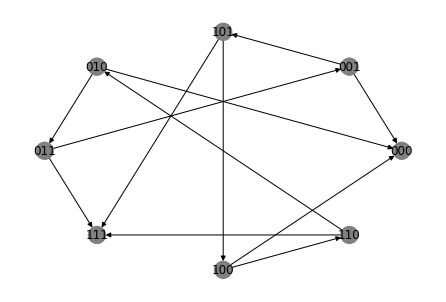

In [93]:
edgelist_a = []
for seq in output_a:
  sequence = seq
  edgelist_a.extend([(''.join([str(st) for st in sequence[i]]),
             ''.join([str(st) for st in sequence[i+1]])) for i in range(len(sequence)-1)])
  
print(edgelist_a)
G = nx.DiGraph(edgelist_a)
nodes = G.nodes()
#print(nodes)
cycle_a = (list(nx.simple_cycles(G)))
#print(cycle_a)
color_map = []
limit_cycle = find_longer_list(nodes)
print(limit_cycle)
for node in G:
  if node in limit_cycle:
    color_map.append('blue')
  else: 
    color_map.append('grey')
    
    
# self-loop
self_loop = list(nx.nodes_with_selfloops(G))
self_loop_edges = list(nx.selfloop_edges(G))
#print(self_loop_edges)
#print(self_loop)

nx.draw_circular(G, node_color=color_map, with_labels=True)
plt.savefig('state_space_network_asynchronous_model_ii.png')

In [89]:
def find_limit_cycle(nodes):
  limit_cycle = list()
  #G = nx.DiGraph(edgelist_a)
  cycle_a = list(nx.simple_cycles(G))
  return cycle_a

print(find_limit_cycle(G))

[['000'], ['001'], ['101'], ['111'], ['100'], ['010'], ['011'], ['110'], ['101', '100', '110', '010', '011', '001']]


In [94]:
def find_longer_list(nodes):
  limit_cycle = find_limit_cycle(nodes)
  long_limit_cycle = list()
  for i in limit_cycle:
    if len(i) != 1:
      long_limit_cycle.append(i)
      return long_limit_cycle

print(find_longer_list(G))

[['101', '100', '110', '010', '011', '001']]


In [95]:
def find_self_cycle(nodes):
  self_cycle = list()
  G = nx.DiGraph(edgelist_a)
  self_loop_edges = list(nx.selfloop_edges(G))
  state = [node[0] for node in self_loop_edges]
  return state

print(find_self_cycle(edgelist_a))

['000', '001', '101', '010', '011', '111', '100', '110']


In [96]:
# Creates a list of all nodes that are not steady states and removes duplicates
def find_not_steady_states(nodes):
  not_steady_state = list()
  self_cycle = find_self_cycle(nodes)
  long_limit_cycle = find_longer_list(nodes)
  #print(len(edgelist_a))
  #print(len(self_cycle))
  for i in range(len(edgelist_a)):
    for j in range(len(self_cycle)):
      if self_cycle[j] == edgelist_a[i][0] and self_cycle[j] != edgelist_a[i][1]:
        if self_cycle[j] not in not_steady_state:
          not_steady_state.append(self_cycle[j])
  return not_steady_state
#print(find_not_steady_states(G))

# Remove the states that are not steady states from a list that contains all the possible nodes
def find_steady_states(nodes):
  steady_states = list()
  self_cycle = find_self_cycle(nodes)
  not_steady_state = find_not_steady_states(nodes)
  steady_states = [x for x in self_cycle if x not in not_steady_state]
  return steady_states
print(find_steady_states(G))  

['000', '111']


In [69]:
# Graphspace Asynchronous
def graphspace_asynchronous(edgelist_a, G):
  limit_cycle = find_longer_list(nodes)
  steady_states = find_steady_states(nodes)
  #random_walk = individual_random_walk(nodes)
  edge_width = 1
  
  file_name = open('mammalian_bool_asynchronous.txt', 'w+')
  file_name.write('head\ttail\thead_label\ttail_label\tedge_popup\tstyle\n')

  head = "{\"head\": {'spec': {'shape': '%s','color': '%s','border': \"black\"}, \"id\": '%s'},"
  tail = "\"tail\": {'spec': {'shape': '%s','color': '%s','border': \"black\"}, \"id\": '%s'},"
  edge = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle', \"color\": '%s', \"width\": '%s'}, \"id\": '%s-%s'}}\n"

  style = head + tail + edge 

  for i in range(0, len(edgelist_a)):
    #if edgelist_a[i][0] in limit_cycle:
      #edge_color = 'blue'
    #else:
      #edge_color = 'grey'
    
    if edgelist_a[i][0] in steady_states:
      shape1 = 'rectangle'
      color1 = 'red'
      edge_color = 'grey'
    else:
      shape1 = 'ellipse'
      color1 = 'grey'
      edge_color = 'grey'
    
    if edgelist_a[i][1] in steady_states:
      shape2 = 'rectangle'
      color2 = 'red'
    else:
      shape2 = 'ellipse'
      color2 = 'grey'
      
    
      #edge_width = 
      #edge_width = str(edge_width)
      #edge_color = 'green'
    #else:
      #edge_width = 1
      #edge_color = 'grey'
        
    file_name.write("%s\t%s\t%s\t%s\t-\t" % (edgelist_a[i][0], edgelist_a[i][1], edgelist_a[i][0], edgelist_a[i][1]))
    file_name.write(style % (shape1, color1, edgelist_a[i][0], shape2, color2, edgelist_a[i][1], 
                             edge_color, edge_width, edgelist_a[i][0], edgelist_a[i][1]))
    
  file_name.close()   
print(graphspace_asynchronous(edgelist_a, G))

None


In [68]:
file_name = open('mammalian_bool_asynchronous.txt', 'r+')
print(file_name.read())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [70]:
# Graphspace Synchronous
def graphspace_synchronous(edgelist, G):
  limit_cycle = find_longer_list(nodes)
  steady_states = find_steady_states(nodes)
  #random_walk = individual_random_walk(nodes)
  edge_width = 1
  
  file_name = open('mammalian_bool_synchronous.txt', 'w+')
  file_name.write('head\ttail\thead_label\ttail_label\tedge_popup\tstyle\n')

  head = "{\"head\": {'spec': {'shape': '%s','color': '%s','border': \"black\"}, \"id\": '%s'},"
  tail = "\"tail\": {'spec': {'shape': '%s','color': '%s','border': \"black\"}, \"id\": '%s'},"
  edge = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle', \"color\": '%s', \"width\": '%s'}, \"id\": '%s-%s'}}\n"

  style = head + tail + edge 

  for i in range(0, len(edgelist)):
    #if edgelist_a[i][0] in limit_cycle:
      #edge_color = 'blue'
    #else:
      #edge_color = 'grey'
    
    if edgelist[i][0] in steady_states:
      shape1 = 'rectangle'
      color1 = 'red'
      edge_color = 'grey'
    else:
      shape1 = 'ellipse'
      color1 = 'grey'
      edge_color = 'grey'
    
    if edgelist[i][1] in steady_states:
      shape2 = 'rectangle'
      color2 = 'red'
    else:
      shape2 = 'ellipse'
      color2 = 'grey'
      
    
      #edge_width = 
      #edge_width = str(edge_width)
      #edge_color = 'green'
    #else:
      #edge_width = 1
      #edge_color = 'grey'
        
    file_name.write("%s\t%s\t%s\t%s\t-\t" % (edgelist[i][0], edgelist[i][1], edgelist[i][0], edgelist[i][1]))
    file_name.write(style % (shape1, color1, edgelist[i][0], shape2, color2, edgelist[i][1], 
                             edge_color, edge_width, edgelist[i][0], edgelist[i][1]))
    
  file_name.close()   
print(graphspace_synchronous(edgelist, G))

None


In [242]:
import random

def individual_random_walk(G): #max_steps):
  count = 0
  path = []
  random_path = []
  all_possible_nodes = find_self_cycle(nodes)
  steady_states = list(find_steady_states(nodes))
  path = random.choice(all_possible_nodes)
  #print(path)
  G = nx.DiGraph(edgelist_a)
  while path not in steady_states and count < 100:  
    #print(path)
    path_index = []
    for i in range(len(edgelist_a)):
      if path == edgelist_a[i][0]:
        path_index.append(edgelist_a[i][1])
    #print(path_index)
    next_edge = random.choice(path_index)
    random_path.append([path, next_edge])
    path = str(next_edge)
    count += 1
  return random_path
  
print(individual_random_walk(G))

[['101', '100'], ['100', '100'], ['100', '100'], ['100', '110'], ['110', '111']]


In [254]:
def simulate(g):
  nodes = G.nodes()
  for i in range (1000):
    random_walk = individual_random_walk(nodes)
    length_of_path = len(random_walk)
    return length_of_path
  num_bins = len(ranom_walk)
  n, bins, patches = plt.hist(length_of_path, num_bins, facecolor='red', alpha=0.5)
  plt.xlabel('')
  plt.ylabel('')
  plt.title('')
  plt.show()

print(simulate(G))
  

3


In [229]:
from collections import Counter

def count_nodes(g):
  nodes = G.nodes()
  node_walk_list = [] #[0 for i in range(len(random_walk))]
  for i in range(100):
    random_walk = individual_random_walk(nodes)
    rw = list(random_walk)
    random_walk = [(e[0],e[1]) for e in rw]  
  #print(random_walk)
  count_node = [0 for i in range(len(random_walk))]
  #print(count_node)
  for j in range(len(random_walk)):
    node_walk_list.append(random_walk[j][1])
  return Counter(node_walk_list)

print(count_nodes(G))

000
000
111
001
100
111
011
111
100
001
011
101
000
111
001
010
111
110
110
001
111
101
101
111
111
110
001
100
001
110
001
111
000
000
000
100
010
110
100
110
000
000
101
101
110
001
110
101
011
100
000
111
010
111
111
010
010
111
001
111
011
110
100
001
100
100
101
101
110
010
010
001
001
010
110
000
011
000
110
110
101
010
110
101
001
100
000
100
010
110
010
000
001
011
101
010
010
110
111
001
Counter({'101': 3, '111': 1})


Counter({'101': 5, '001': 3, '100': 1, '000': 1})


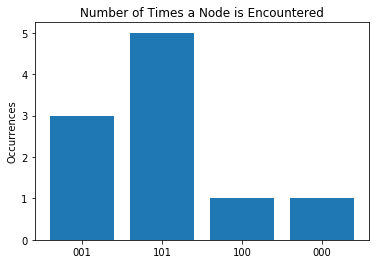

None


In [309]:
import numpy as np
import matplotlib.pyplot as plt

def plot_count_nodes(g):
  nodes = G.nodes()
  count = count_nodes(nodes)
  print(count)
  plt.bar(*zip(*count.items()))
  plt.ylabel('Occurrences')
  plt.title('Number of Times a Node is Encountered')
  plt.show()
  
print(plot_count_nodes(G))


In [0]:
def random_walk(G):
  random_path = []
  all_nodes = G.nodes(edgelist_a)
  steady_states = list(find_steady_states(nodes))
  start = random.choice(all_nodes)
  random_path.append(start)
  #print(random_path)
  node = start
  while node not in steady_states:
    neighbors = G.neighbors(node)
    next_state = random.choice(neighbors)
    random_path.append(next_state)
    node = next_state
  return random_path
  
print(random_walk(G))

In [277]:
def count_traffic(G):
  nodes = G.nodes()
  edges = [e for e in G.edges()]
  #print(edges[0])
  list_widths = [0 for k in range(len(edges))]
  #print(list_widths)
  # Outer loop over random walks
  for i in range(100):
    random_walk = individual_random_walk(nodes)
    if len(random_walk) > 1:
      rw = list(random_walk)
      random_walk = [(e[0],e[1]) for e in rw]
      #print(random_walk)
  # inner loop over edges in G
      for j in range(len(edges)): 
        if edges[j] in random_walk:
          list_widths[j] += 1
     #print(list_widths)
  return list_widths

print(count_traffic(G))
  

[0, 13, 5, 5, 11, 13, 15, 3, 5, 11, 5, 11, 4, 0, 7, 14, 11, 12, 10, 8]


In [324]:
def count_edges(g):
  nodes = G.nodes()
  edges = G.edges()
  edge_walk_list = []
  for i in range(100):
    random_walk = individual_random_walk(nodes)
    rw = list(random_walk)
    random_walk = [(e[0],e[1]) for e in rw]  
  count_edge = [0 for i in range(len(random_walk))]
  #print(count_node)
  for j in range(len(random_walk)):
    edge_walk_list.append(random_walk[j])
  return Counter(edge_walk_list)

print(count_edges(G))

Counter({('010', '010'): 2, ('110', '010'): 1, ('010', '011'): 1, ('011', '001'): 1, ('001', '000'): 1})


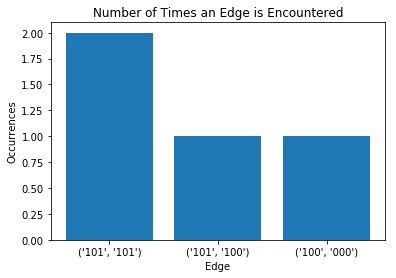

None


In [334]:
def plot_count_edges(g):
  nodes = G.nodes()
  edges = G.edges()
  count = count_edges(nodes)
  plt.bar(range(len(count)), list(count.values()), align='center')
  plt.xticks(range(len(count)), list(count.keys()))
  plt.ylabel('Occurrences')
  plt.xlabel('Edge')
  plt.title('Number of Times an Edge is Encountered')
  plt.show()
  
print(plot_count_edges(G))
  
  

In [189]:
# def node_degrees(nodes):
  in_degree = G.in_degree()
  out_degree = G.out_degree()
  print(in_degree)
  print(out_degree)
  
print(node_degrees(G))


[('000', 4), ('001', 2), ('101', 2), ('010', 2), ('011', 2), ('111', 4), ('100', 2), ('110', 2)]
[('000', 1), ('001', 3), ('101', 3), ('010', 3), ('011', 3), ('111', 1), ('100', 3), ('110', 3)]
None
